In [115]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import report_ensemble
from diabnet.ensemble import Ensemble
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import bootstrap
import scipy.stats as st
import calibration
# warnings.simplefilter(action='ignore', category=FutureWarning)
# sns.set_style("whitegrid")
sns.set_style("ticks",{'axes.grid': True,'grid.color': '.95', 'grid.linestyle': '-', 'grid.zorder': 0})
# sns.set_style("ticks",{'axes.grid': True,'grid.color': '.95', 'grid.linestyle': '--'})
COLORS = sns.color_palette("colorblind")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
ensemble = Ensemble('../data/models/model-positive-13-adamw-lc5-2021-03-03')

../data/models/model-positive-13-adamw-lc5-2021-03-03


In [7]:
r = report_ensemble.DiabNetReport(ensemble, "positivo_1000_random_0.csv")

NEGATIVE FILE ../data/datasets/visits_sp_unique_test_positivo_1000_random_0_negatives_older60.csv


In [23]:
def ece_mce_t_p(preds, targets, bins=10):
    lower_bound = np.arange(0.0, 1.0, 1.0/bins)
    upper_bound = lower_bound + 1.0/bins
    
    ece = np.zeros(1)
    mce = np.zeros(1)
    t = np.zeros(bins)
    p = np.zeros(bins)
    interval_min = np.zeros(bins)
    interval_max = np.zeros(bins)
    
    
    
    for i in range(bins):
        mask = (preds > lower_bound[i]) * (preds <= upper_bound[i])
        if np.any(mask):
#             print(lower_bound[i], upper_bound[i])
#             print(preds[mask])
#             print(targets[mask])
            t[i] = np.mean(targets[mask])
            p[i] = np.mean(preds[mask])
            # num of bootstraps is equal to  
#             data = bootstrap(targets[mask], bootnum=10000, bootfunc=lambda x: np.mean(x) - t[i])
            data = bootstrap(targets[mask], bootnum=10000, bootfunc=lambda x: np.mean(x))
            data = np.sort(data)
#             np.sort(data)
            #print(st.sem(data))
            #interval_min[i], interval_max[i] = st.t.interval(alpha=0.95, df=len(data)-1, loc=t[i], scale=st.sem(data))
#             t[i], _, _, ci = jackknife_stats(targets[mask], np.mean, 0.95)
#             interval_min[i], interval_max[i] = data[249], data[9749]
            interval_min[i], interval_max[i] = data[249]-t[i], data[9749]-t[i]
            delta = np.abs(np.mean(preds[mask]) - np.mean(targets[mask]))
            ece += delta * np.mean(mask)
            mce = np.maximum(mce, delta)
#             print(ece, mce)
            
#     print(interval_min)
#     print(interval_max)
    return ece, mce, t, p, np.stack([np.abs(interval_min), interval_max])

In [12]:
df = pd.DataFrame(r.dataset_test_unique.features)
df.columns = r.feat_names
df['T2D'] = r.dataset_test_unique.labels
df['Pred'] = r.dataset_test_unique.predictions
# correction for soft_label_baseline
# baseline = 0.20
# df['Pred'] = (r.dataset_test_unique.predictions - 0.33)/(0.9 - 0.33)

In [80]:
# df = pd.DataFrame(r.dataset_test_first_diag.features)
# df.columns = r.feat_names
# df['T2D'] = r.dataset_test_first_diag.labels
# df['Pred'] = r.dataset_test_first_diag.predictions

In [81]:
# r.dataset_test_first_diag.df

In [82]:
# df = pd.DataFrame(r.dataset_test_unique_subset_older50.features)
# df.columns = r.feat_names
# df['T2D'] = r.dataset_test_unique_subset_older50.labels
# df['Pred'] = r.dataset_test_unique_subset_older50.predictions

In [13]:
df

,snp_8_133462953,snp_2_91635413,snp_9_25963828,snp_1_17764169,snp_12_41767967,snp_4_49530811,snp_2_96519717,snp_7_116910447,snp_18_56742728,snp_3_75912490,...,snp_20_50189624,snp_1_143276644,snp_16_9536673,snp_20_25734788,AGE,sex,mo_t2d,fa_t2d,T2D,Pred
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,51,M,2,2,1,0.901883
1,0,0,0,1,0,1,1,0,0,1,...,1,1,0,1,40,F,0,1,0,0.086617
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,52,F,0,2,1,0.422955
3,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,34,M,0,1,0,0.034907
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,37,F,1,1,0,0.014082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0,2,0,1,0,1,1,0,0,0,...,0,1,0,1,36,M,1,0,0,0.029540
546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,41,M,0,2,0,0.405025
547,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,67,F,2,2,0,0.064399
548,0,0,1,1,0,1,1,0,0,1,...,1,1,0,1,41,F,0,2,0,0.214895


In [114]:
calibration.get_ece(df['Pred'].values,df['T2D'].values, debias=False)

0.09725867330657573

In [15]:
calibration.get_top_calibration_error(df['Pred'].values,df['T2D'].values)

0.10761499597505289

In [16]:
calibration.get_calibration_error_uncertainties(df['Pred'].values,df['T2D'].values)

[0.08065592415289588, 0.1157233027027234, 0.1455257305784904]

In [10]:
help(calibration.get_ece)

Help on function get_ece in module calibration.utils:

get_ece(probs, labels, debias=False, num_bins=15, mode='top-label')



In [102]:
zs = df['Pred'].values
ys = df['T2D'].values
calibrator = calibration.PlattCalibrator(300, num_bins=10)
calibrator.train_calibration(zs, ys)
calibrated_zs = calibrator.calibrate(zs)
calibration.get_ece(calibrated_zs, ys)
# calibration.get_calibration_error_uncertainties(calibrated_zs, ys)

0.031804330786439315

In [103]:
help(calibration.PlattCalibrator)

Help on class PlattCalibrator in module calibration.calibrators:

class PlattCalibrator(builtins.object)
 |  PlattCalibrator(num_calibration, num_bins)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, num_calibration, num_bins)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  calibrate(self, zs)
 |  
 |  train_calibration(self, zs, ys)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [110]:
df["CalPred"] = calibrated_zs

In [104]:
BINS=10
ece, mce, t, p, ece_ci = ece_mce_t_p(calibrated_zs, ys, bins=BINS)

In [105]:
print(ece, mce)
ece_ci

[0.02958536] [0.13043646]


array([[0.02016129, 0.08108108, 0.125     , 0.14705882, 0.21052632,
        0.2173913 , 0.19047619, 0.16666667, 0.18181818, 0.        ],
       [0.02016129, 0.09459459, 0.15      , 0.14705882, 0.21052632,
        0.17391304, 0.19047619, 0.125     , 0.13636364, 0.        ]])

(-0.0, 1.0)

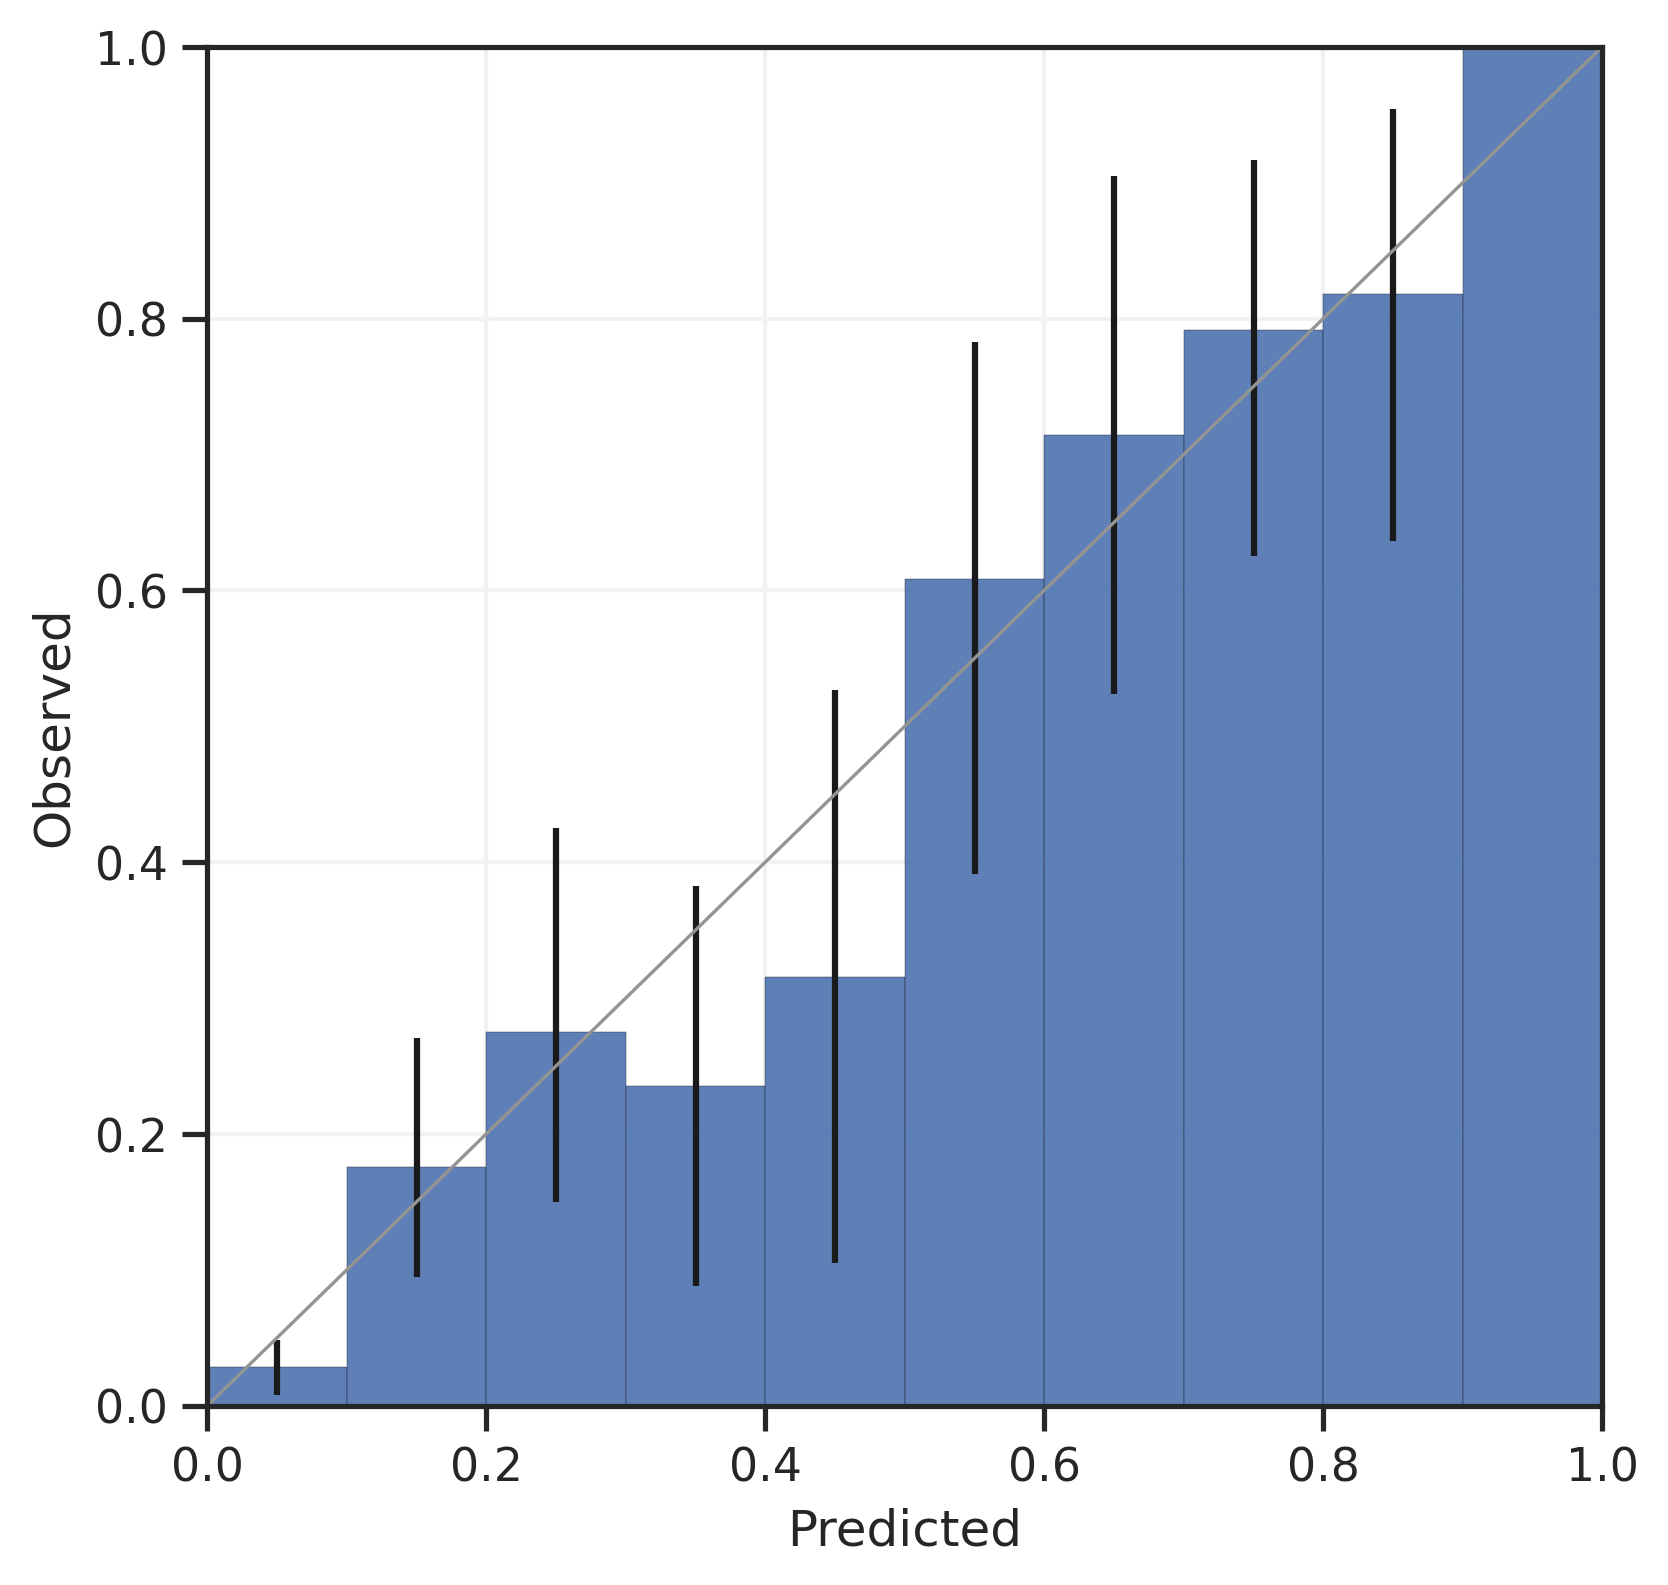

In [106]:
plt.figure(figsize=(6,6), dpi=300)
width = 1.0/BINS
xs = np.arange(width/2,1,width)
plt.bar(xs,t,width, yerr=ece_ci, align='center', linewidth=0.1, alpha=0.9, edgecolor='k')
plt.plot([0,1],[0,1], color=COLORS[7], linewidth=.8)
plt.ylabel("Observed")
plt.xlabel("Predicted")
plt.ylim(-0.0,1.0)
plt.xlim(-0.0,1.0)

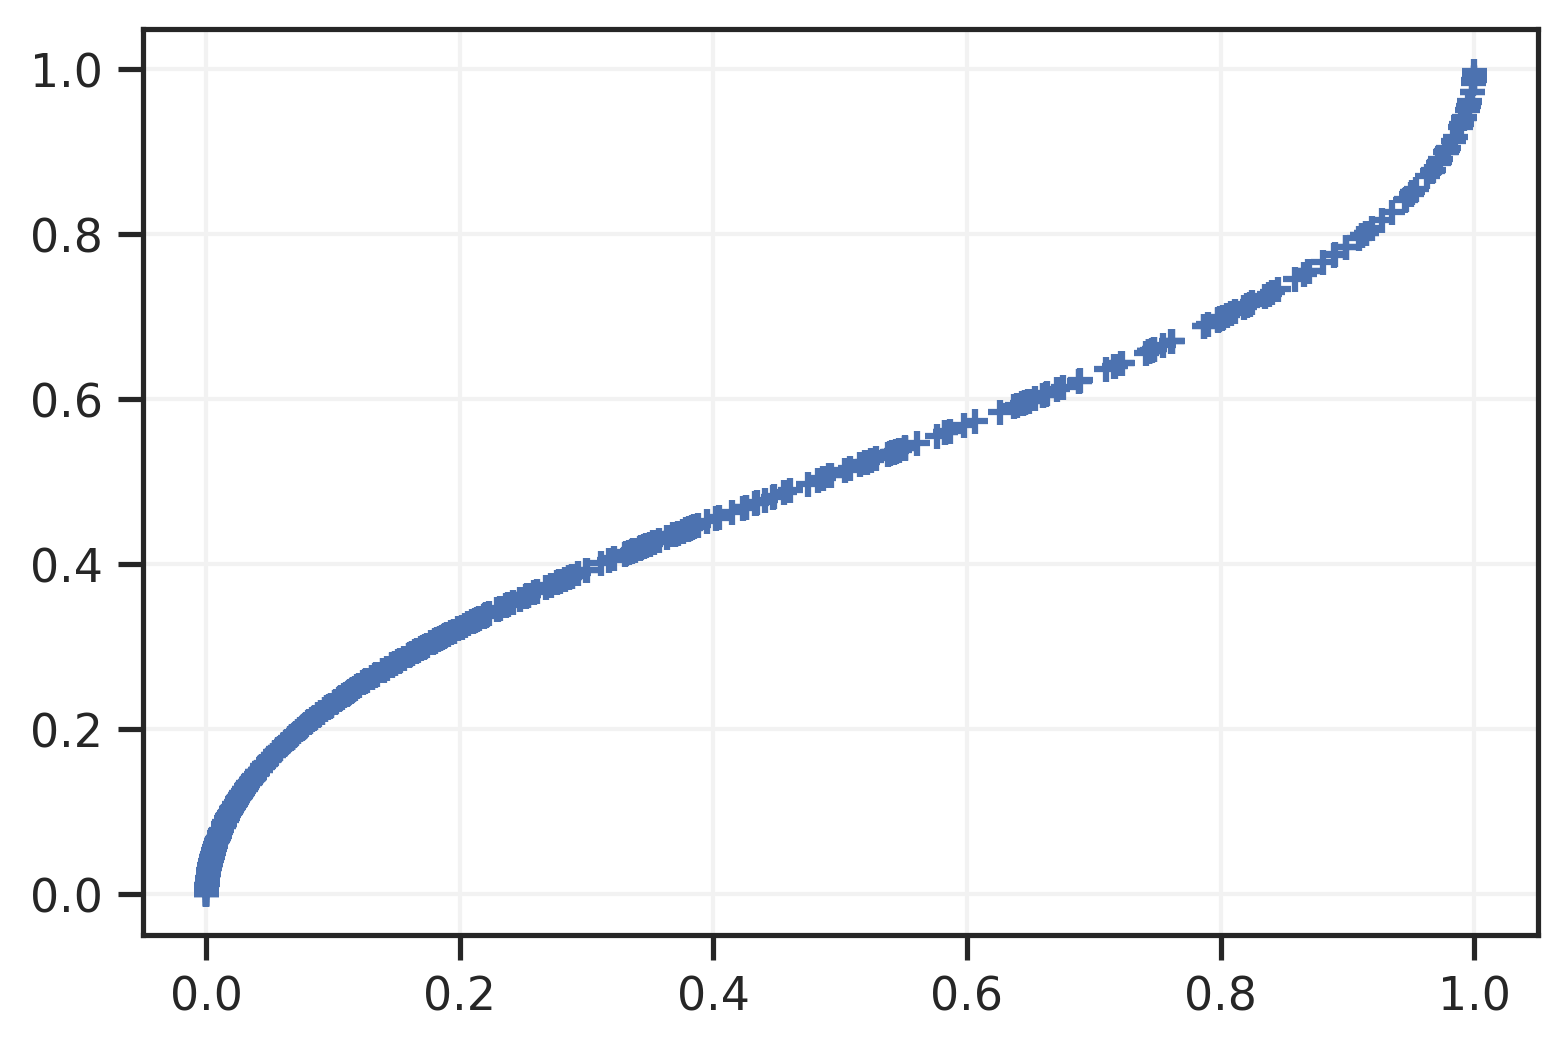

In [107]:
fig = plt.figure(dpi=300)
plt.scatter(calibrated_zs, zs, marker='+')

## Mean calibration

In [87]:
df['T2D'].mean(), df['Pred'].mean()

(0.28363636363636363, 0.3353797)

<AxesSubplot:>

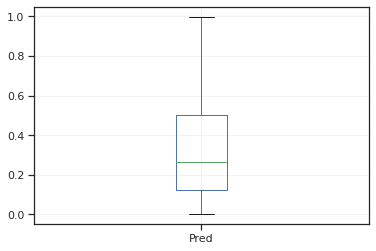

In [88]:
df['Pred'].plot.box()

In [89]:
df['Pred'].describe()

count    550.000000
mean       0.335380
std        0.261708
min        0.000000
25%        0.123605
50%        0.264554
75%        0.504226
max        0.998282
Name: Pred, dtype: float64

In [90]:
df[df["T2D"] == 1].describe()

,T2D,Pred
count,156.0,156.000000
mean,1.0,0.626055
std,0.0,0.235068
min,1.0,0.083016
25%,1.0,0.458391
50%,1.0,0.643652
75%,1.0,0.809719
max,1.0,0.998282


In [91]:
df[df["T2D"] == 0].describe()

,T2D,Pred
count,394.0,394.000000
mean,0.0,0.220290
std,0.0,0.164520
min,0.0,0.000000
25%,0.0,0.090924
50%,0.0,0.190272
75%,0.0,0.314712
max,0.0,0.784522


(array([85., 87., 71., 51., 37., 30., 15.,  9.,  5.,  4.]),
 array([0.        , 0.07845221, 0.15690443, 0.23535663, 0.31380886,
        0.39226106, 0.47071326, 0.5491655 , 0.6276177 , 0.7060699 ,
        0.7845221 ], dtype=float32),
 <BarContainer object of 10 artists>)

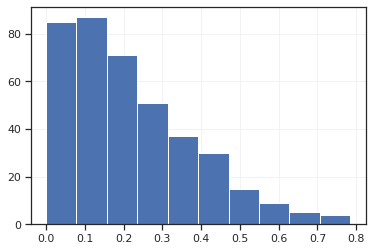

In [111]:
plt.hist(df[df["T2D"] == 0].Pred)


(array([228.,  58.,  37.,  22.,  22.,   5.,   8.,   5.,   5.,   4.]),
 array([7.42161348e-22, 8.98861683e-02, 1.79772337e-01, 2.69658505e-01,
        3.59544673e-01, 4.49430842e-01, 5.39317010e-01, 6.29203178e-01,
        7.19089346e-01, 8.08975515e-01, 8.98861683e-01]),
 <BarContainer object of 10 artists>)

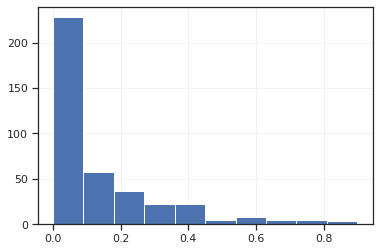

In [112]:
plt.hist(df[df["T2D"] == 0].CalPred)

(array([ 5.,  8., 13., 13., 15., 20., 26., 17., 19., 20.]),
 array([0.08301596, 0.17454256, 0.26606917, 0.35759577, 0.44912237,
        0.540649  , 0.63217556, 0.7237022 , 0.8152288 , 0.9067554 ,
        0.998282  ], dtype=float32),
 <BarContainer object of 10 artists>)

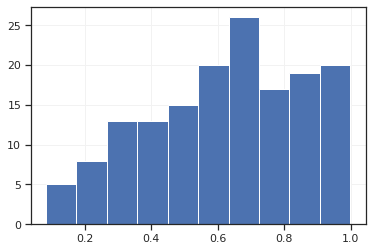

In [93]:
plt.hist(df[df["T2D"] == 1].Pred)

(array([10., 10., 12.,  7.,  6., 14., 15., 21., 16., 45.]),
 array([0.01327349, 0.11194463, 0.21061577, 0.30928691, 0.40795805,
        0.50662919, 0.60530034, 0.70397148, 0.80264262, 0.90131376,
        0.9999849 ]),
 <BarContainer object of 10 artists>)

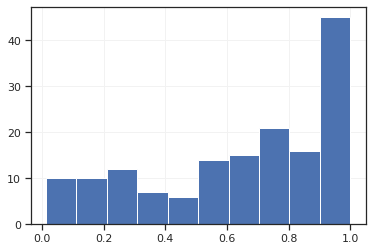

In [113]:
plt.hist(df[df["T2D"] == 1].CalPred)

(array([109., 105.,  86.,  63.,  48.,  38.,  35.,  24.,  16.,  26.]),
 array([0.        , 0.0998282 , 0.1996564 , 0.2994846 , 0.3993128 ,
        0.499141  , 0.5989692 , 0.6987974 , 0.7986256 , 0.89845383,
        0.998282  ], dtype=float32),
 <BarContainer object of 10 artists>)

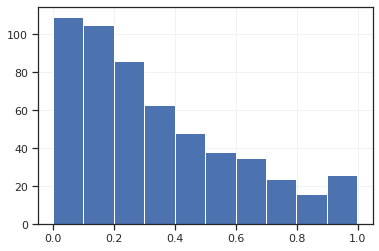

In [93]:
plt.hist(df.Pred)

(array([248.,  74.,  40.,  34.,  19.,  23.,  21.,  24.,  22.,  45.]),
 array([7.42161348e-22, 9.99984898e-02, 1.99996980e-01, 2.99995469e-01,
        3.99993959e-01, 4.99992449e-01, 5.99990939e-01, 6.99989428e-01,
        7.99987918e-01, 8.99986408e-01, 9.99984898e-01]),
 <BarContainer object of 10 artists>)

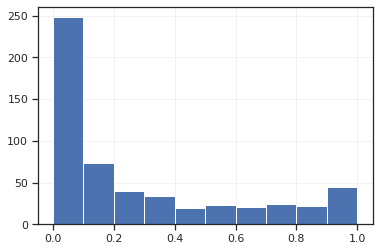

In [108]:
plt.hist(calibrated_zs)

(array([109., 105.,  86.,  63.,  48.,  38.,  35.,  24.,  16.,  26.]),
 array([0.        , 0.0998282 , 0.1996564 , 0.2994846 , 0.3993128 ,
        0.499141  , 0.5989692 , 0.6987974 , 0.7986256 , 0.89845383,
        0.998282  ], dtype=float32),
 <BarContainer object of 10 artists>)

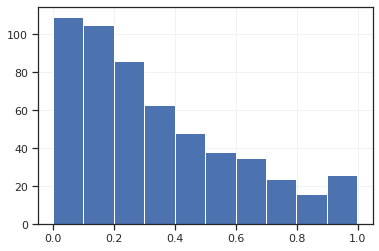

In [71]:
plt.hist(df.Pred)

In [95]:
# plt.hist(df[df['T2D']==1]['Pred'])

In [96]:
# df[(df['T2D']==1)&(df['Pred']>0.5)].count()